In [4]:
import pandas as pd
import psycopg2

conn = psycopg2.connect(
    dbname='skolenie',
    user='postgres',
    password='postgres',
    host='localhost',
    port=5432
)

In [5]:
data = pd.read_sql('select * from objednavka_view',conn)

#print(data)

najdrahsi = data.loc[data['cena'].idxmax()]

najlacnejsi = data.loc[data['cena'].idxmin()]

print(najdrahsi)

print(najlacnejsi)


objednavka_id                    103
mnozstvo                          73
cena                            15.6
typ                     odberatelska
datum            2024-02-04 00:00:00
nazov                   prací prášok
dodavatel                       None
odberatel              Kancel Office
Name: 540, dtype: object
objednavka_id                     15
mnozstvo                          92
cena                            0.14
typ                     dodavatelska
datum            2024-05-18 00:00:00
nazov                         obálka
dodavatel           Potraviny Expert
odberatel                       None
Name: 69, dtype: object


C:\Users\ruman\AppData\Local\Temp\ipykernel_7776\3752372711.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql('select * from objednavka_view',conn)


C:\Users\ruman\AppData\Local\Temp\ipykernel_7508\1311828893.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM objednavky_view", conn)


      objednavka_id      datum           typ                 nazov  mnozstvo  \
0                 1 2024-07-15  dodavatelska               horčica        37   
1                 1 2024-07-15  dodavatelska  struhadlo na ceruzky        23   
2                 1 2024-07-15  dodavatelska              pomaranč        60   
3                 1 2024-07-15  dodavatelska                marker        43   
4                 1 2024-07-15  dodavatelska                 mydlo        68   
...             ...        ...           ...                   ...       ...   
1099            199 2024-02-08  dodavatelska         lepiaca páska        31   
1100            199 2024-02-08  dodavatelska                obálka        24   
1101            200 2024-05-04  dodavatelska               bryndza        66   
1102            200 2024-05-04  dodavatelska  struhadlo na ceruzky        92   
1103            200 2024-05-04  dodavatelska           písací blok        33   

      cena  kategoria  
0     2.65     

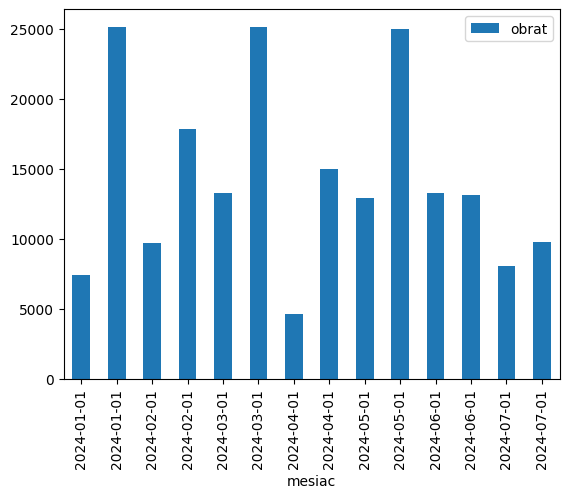

In [1]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(
    host="localhost",
    dbname="sklad",
    user="postgres",
    password='admin')

cur = conn.cursor()

def fetch_data():
    df = pd.read_sql("SELECT * FROM objednavky_view", conn)
    print(df)
    df['datum'] = pd.to_datetime(df['datum'])
    df['mesiac'] = df['datum'].dt.to_period('M').dt.to_timestamp()
    df['hodnota'] = df['mnozstvo'] * df['cena']
    return df

import datetime
from decimal import Decimal

def report_mesacne_obraty(df):
    df = df.groupby(['mesiac','typ']).agg(
        pocet_objednavok = ('objednavka_id','nunique'),
        ks_spolu = ('mnozstvo','sum'),
        obrat = ('hodnota','sum')
    ).reset_index().sort_values(['mesiac','typ'])
    return df


data = fetch_data()
df = report_mesacne_obraty(data)
df['mesiac'] = df['mesiac'].dt.strftime('%Y-%m-%d')
df.to_excel("report_mesacne_obraty_pandas.xlsx", index=False)


import matplotlib.pyplot as plt

df.plot(x='mesiac', y='obrat', kind='bar')
plt.show()




0        122.12
1        403.69
2         58.88
3        686.34
4        136.30
         ...   
1076       5.70
1077    1239.20
1078     429.44
1079     135.36
1080     383.46
Name: trzba, Length: 1081, dtype: float64
                nazov    trzba
0              alobal   855.34
1              ananas  1880.78
2    balená voda 1.5l   706.59
3               banán  3016.79
4          batérie AA  6671.05
5         batérie AAA  1578.62
6       bravčové mäso  2467.27
7           brokolica  1292.00
8             bryndza  1038.48
9             ceruzka   397.71
10             cesnak  1175.12
11          cestoviny  1835.92
12             chlieb   711.27
13             cibuľa  4636.16
14              cukor  2393.23
15               diár  3119.79
16           farbičky  1064.56
17              fixka   371.01
18  guma na gumovanie   130.13
19            horalka   825.16


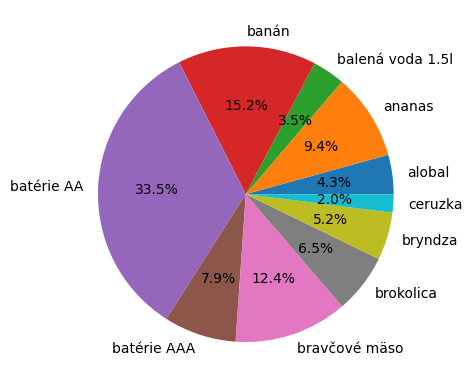

In [6]:
data['trzba'] = data['cena'] * data['mnozstvo']

print(data['trzba'])

obrat_podla_produktov = data.groupby('nazov')['trzba'].sum().reset_index()

print(obrat_podla_produktov.head(20))

import matplotlib.pyplot as plt


plt.pie(obrat_podla_produktov['trzba'].head(10),labels=obrat_podla_produktov['nazov'].head(10),autopct='%1.1f%%')
plt.show()
